# Single Neuron

In [5]:
# Import the dependencies
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers

#Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


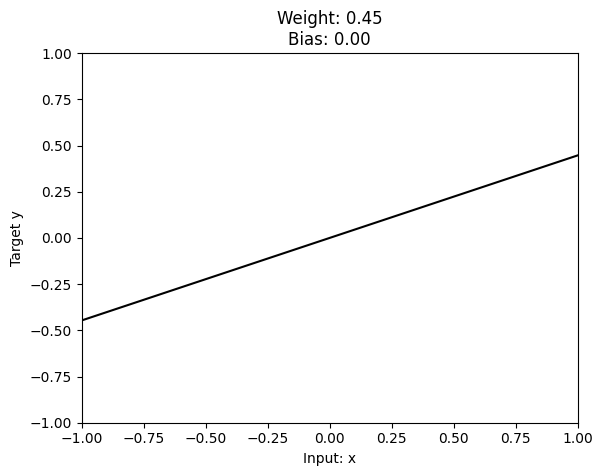

In [9]:


model = keras.Sequential([
    layers.Dense(1, input_shape=[1]),
])

x = tf.linspace(-1.0, 1.0, 100)
y = model.predict(x)

plt.figure(dpi=100)
plt.plot(x, y, 'k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("Input: x")
plt.ylabel("Target y")
w, b = model.weights # you could also use model.get_weights() here
plt.title("Weight: {:0.2f}\nBias: {:0.2f}".format(w[0][0], b[0]))
plt.show()

# Simple Neural Network in Python using TensorFlow

In [12]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
print(tf.config.list_physical_devices('CPU'))


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


## Steps before Creating a Neural Network (Preprocess the Data)

In [53]:
# Load Titanic dataset
titanic = sns.load_dataset('titanic')


In [54]:
titanic.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


In [55]:

# Preprocessing
# Dropping rows with missing 'age' and 'embarked' values
titanic.dropna(subset=['embarked'], inplace=True)

# Converting categorical variables to dummy variables
titanic = pd.get_dummies(titanic, columns=['alive','sex', 'embarked', 'class', 'who',"adult_male"], drop_first=True)

In [56]:
# Selecting features and target
X = titanic.drop(['survived', 'embark_town', 'alone',"deck","embark_town"], axis=1)
y = titanic['survived']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
X_train.shape[1]#only column

14

In [ ]:
# Building the model

# define the layers of the model
input_layer = tf.keras.layers.Dense(units=10, activation='relu', input_shape=(X_train.shape[1],)) # input layer
# hidden_layer = tf.keras.layers.Dense(10, activation='relu') # hidden layer
output_layer = tf.keras.layers.Dense(1, activation='sigmoid') # output layer

# combine the layers into a model
model = tf.keras.models.Sequential([input_layer, 
                                    # hidden_layer, 
                                    output_layer])
# model = keras.Sequential([
#     layers.Dense(1024, activation='relu', input_shape=[11]),
#     layers.Dropout(0.3),
#     layers.BatchNormalization(),
#     layers.Dense(1024, activation='relu'),
#     layers.Dropout(0.3),
#     layers.BatchNormalization(),
#     layers.Dense(1024, activation='relu'),
#     layers.Dropout(0.3),
#     layers.BatchNormalization(),
#     layers.Dense(1),
# ])

In [ ]:
# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', #It is only used for the two target variable 
              metrics=['accuracy'] #Classification
              )

In [68]:
%%time
# Training the model
history=model.fit(X_train, y_train, epochs=85, batch_size=32, verbose=1)

Epoch 1/85
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6104 - loss: 0.6918
Epoch 2/85
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6106 - loss: 0.6909
Epoch 3/85
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6090 - loss: 0.6892 
Epoch 4/85
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5996 - loss: 0.6880 
Epoch 5/85
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6310 - loss: 0.6844
Epoch 6/85
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6125 - loss: 0.6842
Epoch 7/85
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6147 - loss: 0.6826
Epoch 8/85
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6278 - loss: 0.6797
Epoch 9/85
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6301 - loss: 0.6778
Epoch 10/85
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6070 - loss: 0.6799
Epoch 11/85
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5963 - loss: 0.6807
Epoch 12/85
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6194 - 

In [69]:
# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {accuracy}")
print(f"Test Loss: {loss}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6385 - loss: 0.6554  
Test Accuracy: 0.6123595237731934
Test Loss: 0.6677092909812927


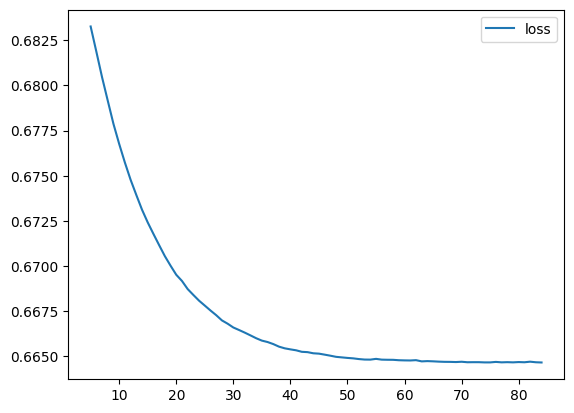

In [70]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[5:, ['loss']].plot();

# Check if GPU is available

In [72]:
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import scipy as sp
import tensorflow as tf
import platform

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print(f"SciPy {sp.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: Windows-11-10.0.22631-SP0
Tensor Flow Version: 2.17.0

Python 3.12.4 (tags/v3.12.4:8e8a4ba, Jun  6 2024, 19:30:16) [MSC v.1940 64 bit (AMD64)]
Pandas 2.2.2
Scikit-Learn 1.5.1
SciPy 1.13.1
GPU is NOT AVAILABLE


---